Данная лабораторная работа ориентирована на знакомство с различными методами оценки качестве моделей в задачах машинного обучениях с реализацией на языке программирования Python:

Реализовать классический и скорректированный коэффициенты детерминации для выбора модели.

Реализовать процедуру выбора модели с использование различных версий критерия Акаике и байесовского информационных критериев.

Продемонстрировать примеры оценивания моделей с использованием метрик accuracy, точность, полнота, F-мера в задачах классификации.

Продемонстрировать примеры различных соотношений для AUC-ROC (см. пример в лекции).

Реализовать логистическую регрессию для задачи классификации.

Продемонстрировать примеры оценивания моделей с использованием метрик MSE (RMSE), MAE, MAPE, SMAPE и WAPE в задачах регрессии.

С использованием метрик, оценить качество заполнения пропусков в пользовательских данных.

In [1]:
def determination (y_true, y_pred) :
    length=len(y_true)
    average=0
    for x in y_true :
        average+=x
    average/=length
    sum1=0
    sum2=0
    for i in range(length) :
        sum1+=(y_true[i]-y_pred[i])**2
        sum2+=(y_true[i]-average)**2
    return 1-sum1/sum2
def adj_determination (y_true, y_pred, param_num) :
    length=len(y_true)
    return 1-(1-determination(y_true, y_pred))*(length-1)/(length-1-param_num)

In [2]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(r2_score(y_true, y_pred), determination(y_true, y_pred))

0.9486081370449679 0.9486081370449679


In [3]:
import random
y_true=[i for i in range(100)]
y_pred=[y_true[i]+random.uniform(-10, 10) for i in range(100)]
print(adj_determination (y_true, y_pred, 2), adj_determination (y_true, y_pred, 20))

0.957581987991921 0.9479171244964093


In [28]:
import numpy as np
np.random.seed(42)

sample_size = 100
X = np.random.uniform(-10, 10, sample_size)
mean = 0
std_dev = 10
eps = np.random.normal(mean, std_dev, sample_size)
Y = X**2 - 1/10*X**3 + eps
#print(eps)

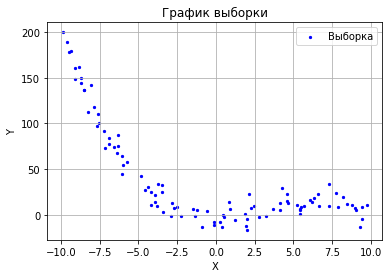

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, s=5, c='b', label='Выборка')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('График выборки')
plt.legend()
plt.grid(True)
plt.show()

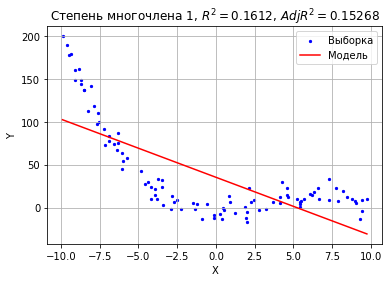

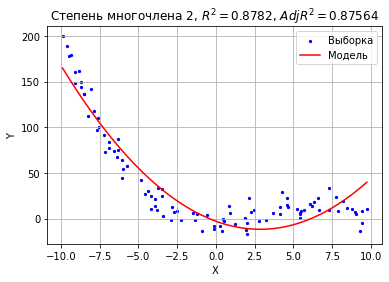

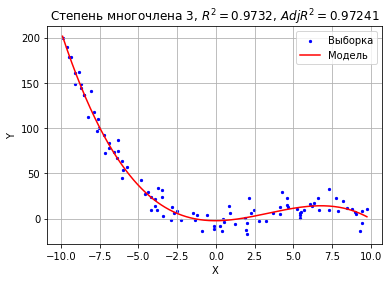

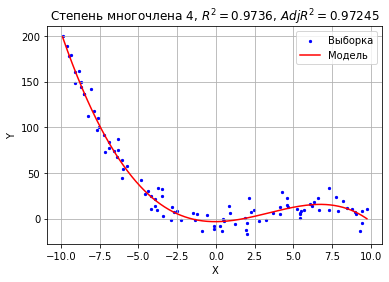

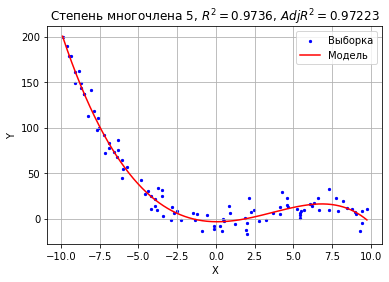

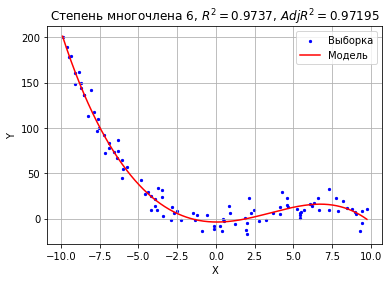

Степень многочлена 1: R^2 = 0.1612, Adj R^2 = 0.15268
Степень многочлена 2: R^2 = 0.8782, Adj R^2 = 0.87564
Степень многочлена 3: R^2 = 0.9732, Adj R^2 = 0.97241
Степень многочлена 4: R^2 = 0.9736, Adj R^2 = 0.97245
Степень многочлена 5: R^2 = 0.9736, Adj R^2 = 0.97223
Степень многочлена 6: R^2 = 0.9737, Adj R^2 = 0.97195


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
r_squared_values = []
adj_r_squared_values = []

for degree in range(1, 7):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(X_poly, Y)
    
    r_squared = determination(model.predict(X_poly), Y)
    adj_r_squared = adj_determination (model.predict(X_poly), Y, degree)
    r_squared_values.append(r_squared)
    adj_r_squared_values.append(adj_r_squared)

    X_plot = np.linspace(min(X), max(X), 1000)
    X_plot_poly = poly.transform(X_plot.reshape(-1, 1))
    Y_plot = model.predict(X_plot_poly)

    plt.scatter(X, Y, s=5, c='b', label='Выборка')
    plt.plot(X_plot, Y_plot, color='r', label='Модель')
    plt.title(f'Степень многочлена {degree}, $R^2 = {r_squared:.4f}$, $Adj R^2 = {adj_r_squared:.5f}$')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

for degree in range(1, 7):
    print(f"Степень многочлена {degree}: R^2 = {r_squared_values[degree-1]:.4f}, Adj R^2 = {adj_r_squared_values[degree-1]:.5f}")

In [36]:
import numpy as np
import statsmodels.api as sm 


def fit_polynomial(degree, X, Y):
    X_poly = sm.add_constant(np.column_stack([X**i for i in range(1, degree + 1)]))
    model = sm.OLS(Y, X_poly).fit()
    aic = model.aic
    bic = model.bic
    return aic, bic


for degree in range(1, 7):
    aic, bic = fit_polynomial(degree, X, Y)
    print(f"Степень многочлена {degree}: AIC = {aic:.4f}, BIC = {bic:.4f}")

Степень многочлена 1: AIC = 1008.7296, BIC = 1013.9400
Степень многочлена 2: AIC = 867.2272, BIC = 875.0427
Степень многочлена 3: AIC = 726.4879, BIC = 736.9086
Степень многочлена 4: AIC = 727.3256, BIC = 740.3514
Степень многочлена 5: AIC = 729.0548, BIC = 744.6858
Степень многочлена 6: AIC = 730.9874, BIC = 749.2236


In [37]:
import pandas as pd
#Ссылка на датасет
#https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
file_path = 'creditcard.csv'
df = pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
y=df['Class']
X = df.drop('Class', axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
const_model=[0]*len(y_test)
print(accuracy_score(const_model, y_test), 
precision_score(const_model, y_test), 
recall_score(const_model, y_test), 
f1_score(const_model, y_test))

0.9982763573685722 0.0 0.0 0.0


C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
prediction = clf.predict(X_test)
print(accuracy_score(prediction, y_test), 
precision_score(prediction, y_test), 
recall_score(prediction, y_test), 
f1_score(prediction, y_test))

0.9990530605296477 0.7592592592592593 0.7109826589595376 0.7343283582089553


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(accuracy_score(prediction, y_test), 
precision_score(prediction, y_test), 
recall_score(prediction, y_test), 
f1_score(prediction, y_test))

Learning rate set to 0.096997
0:	learn: 0.3687590	total: 278ms	remaining: 4m 37s
1:	learn: 0.2045472	total: 328ms	remaining: 2m 43s
2:	learn: 0.1094724	total: 377ms	remaining: 2m 5s
3:	learn: 0.0594253	total: 424ms	remaining: 1m 45s
4:	learn: 0.0345568	total: 474ms	remaining: 1m 34s
5:	learn: 0.0215169	total: 533ms	remaining: 1m 28s
6:	learn: 0.0142317	total: 580ms	remaining: 1m 22s
7:	learn: 0.0101361	total: 630ms	remaining: 1m 18s
8:	learn: 0.0077942	total: 696ms	remaining: 1m 16s
9:	learn: 0.0061675	total: 760ms	remaining: 1m 15s
10:	learn: 0.0051238	total: 814ms	remaining: 1m 13s
11:	learn: 0.0044219	total: 865ms	remaining: 1m 11s
12:	learn: 0.0038799	total: 919ms	remaining: 1m 9s
13:	learn: 0.0035448	total: 971ms	remaining: 1m 8s
14:	learn: 0.0032729	total: 1.02s	remaining: 1m 6s
15:	learn: 0.0030571	total: 1.06s	remaining: 1m 5s
16:	learn: 0.0029092	total: 1.1s	remaining: 1m 3s
17:	learn: 0.0027747	total: 1.16s	remaining: 1m 3s
18:	learn: 0.0026712	total: 1.22s	remaining: 1m 2s
1

163:	learn: 0.0011039	total: 9.27s	remaining: 47.3s
164:	learn: 0.0011016	total: 9.33s	remaining: 47.2s
165:	learn: 0.0010994	total: 9.38s	remaining: 47.1s
166:	learn: 0.0010915	total: 9.43s	remaining: 47s
167:	learn: 0.0010860	total: 9.48s	remaining: 47s
168:	learn: 0.0010824	total: 9.53s	remaining: 46.9s
169:	learn: 0.0010796	total: 9.58s	remaining: 46.8s
170:	learn: 0.0010775	total: 9.62s	remaining: 46.7s
171:	learn: 0.0010750	total: 9.67s	remaining: 46.6s
172:	learn: 0.0010702	total: 9.72s	remaining: 46.5s
173:	learn: 0.0010679	total: 9.78s	remaining: 46.4s
174:	learn: 0.0010657	total: 9.82s	remaining: 46.3s
175:	learn: 0.0010638	total: 9.87s	remaining: 46.2s
176:	learn: 0.0010605	total: 9.91s	remaining: 46.1s
177:	learn: 0.0010591	total: 9.96s	remaining: 46s
178:	learn: 0.0010577	total: 10s	remaining: 45.9s
179:	learn: 0.0010556	total: 10.1s	remaining: 45.8s
180:	learn: 0.0010476	total: 10.1s	remaining: 45.8s
181:	learn: 0.0010422	total: 10.2s	remaining: 45.7s
182:	learn: 0.001039

322:	learn: 0.0006260	total: 17.8s	remaining: 37.4s
323:	learn: 0.0006255	total: 17.9s	remaining: 37.3s
324:	learn: 0.0006249	total: 17.9s	remaining: 37.2s
325:	learn: 0.0006227	total: 18s	remaining: 37.2s
326:	learn: 0.0006221	total: 18s	remaining: 37.1s
327:	learn: 0.0006213	total: 18.1s	remaining: 37.1s
328:	learn: 0.0006186	total: 18.2s	remaining: 37s
329:	learn: 0.0006163	total: 18.2s	remaining: 37s
330:	learn: 0.0006114	total: 18.3s	remaining: 36.9s
331:	learn: 0.0006085	total: 18.3s	remaining: 36.9s
332:	learn: 0.0006011	total: 18.4s	remaining: 36.8s
333:	learn: 0.0006002	total: 18.4s	remaining: 36.7s
334:	learn: 0.0005997	total: 18.5s	remaining: 36.7s
335:	learn: 0.0005978	total: 18.5s	remaining: 36.6s
336:	learn: 0.0005937	total: 18.6s	remaining: 36.6s
337:	learn: 0.0005892	total: 18.6s	remaining: 36.5s
338:	learn: 0.0005872	total: 18.7s	remaining: 36.4s
339:	learn: 0.0005854	total: 18.7s	remaining: 36.4s
340:	learn: 0.0005833	total: 18.8s	remaining: 36.4s
341:	learn: 0.000582

482:	learn: 0.0003559	total: 26.8s	remaining: 28.7s
483:	learn: 0.0003549	total: 26.9s	remaining: 28.6s
484:	learn: 0.0003528	total: 26.9s	remaining: 28.6s
485:	learn: 0.0003524	total: 27s	remaining: 28.5s
486:	learn: 0.0003522	total: 27s	remaining: 28.5s
487:	learn: 0.0003503	total: 27.1s	remaining: 28.4s
488:	learn: 0.0003500	total: 27.2s	remaining: 28.4s
489:	learn: 0.0003480	total: 27.2s	remaining: 28.3s
490:	learn: 0.0003455	total: 27.3s	remaining: 28.3s
491:	learn: 0.0003453	total: 27.3s	remaining: 28.2s
492:	learn: 0.0003446	total: 27.4s	remaining: 28.2s
493:	learn: 0.0003442	total: 27.5s	remaining: 28.2s
494:	learn: 0.0003425	total: 27.6s	remaining: 28.1s
495:	learn: 0.0003408	total: 27.6s	remaining: 28.1s
496:	learn: 0.0003401	total: 27.7s	remaining: 28s
497:	learn: 0.0003384	total: 27.8s	remaining: 28s
498:	learn: 0.0003383	total: 27.8s	remaining: 27.9s
499:	learn: 0.0003378	total: 27.9s	remaining: 27.9s
500:	learn: 0.0003371	total: 27.9s	remaining: 27.8s
501:	learn: 0.000336

646:	learn: 0.0002052	total: 35.2s	remaining: 19.2s
647:	learn: 0.0002040	total: 35.2s	remaining: 19.1s
648:	learn: 0.0002037	total: 35.3s	remaining: 19.1s
649:	learn: 0.0002023	total: 35.3s	remaining: 19s
650:	learn: 0.0002022	total: 35.3s	remaining: 18.9s
651:	learn: 0.0002020	total: 35.4s	remaining: 18.9s
652:	learn: 0.0002018	total: 35.4s	remaining: 18.8s
653:	learn: 0.0002008	total: 35.5s	remaining: 18.8s
654:	learn: 0.0002005	total: 35.5s	remaining: 18.7s
655:	learn: 0.0001991	total: 35.5s	remaining: 18.6s
656:	learn: 0.0001986	total: 35.6s	remaining: 18.6s
657:	learn: 0.0001983	total: 35.6s	remaining: 18.5s
658:	learn: 0.0001982	total: 35.7s	remaining: 18.4s
659:	learn: 0.0001965	total: 35.7s	remaining: 18.4s
660:	learn: 0.0001962	total: 35.7s	remaining: 18.3s
661:	learn: 0.0001956	total: 35.8s	remaining: 18.3s
662:	learn: 0.0001955	total: 35.8s	remaining: 18.2s
663:	learn: 0.0001952	total: 35.8s	remaining: 18.1s
664:	learn: 0.0001946	total: 35.9s	remaining: 18.1s
665:	learn: 0.

806:	learn: 0.0001385	total: 41.3s	remaining: 9.88s
807:	learn: 0.0001384	total: 41.3s	remaining: 9.82s
808:	learn: 0.0001382	total: 41.4s	remaining: 9.77s
809:	learn: 0.0001379	total: 41.4s	remaining: 9.72s
810:	learn: 0.0001375	total: 41.5s	remaining: 9.66s
811:	learn: 0.0001374	total: 41.5s	remaining: 9.61s
812:	learn: 0.0001369	total: 41.5s	remaining: 9.55s
813:	learn: 0.0001364	total: 41.6s	remaining: 9.5s
814:	learn: 0.0001362	total: 41.6s	remaining: 9.44s
815:	learn: 0.0001356	total: 41.6s	remaining: 9.39s
816:	learn: 0.0001355	total: 41.7s	remaining: 9.34s
817:	learn: 0.0001353	total: 41.7s	remaining: 9.28s
818:	learn: 0.0001353	total: 41.8s	remaining: 9.23s
819:	learn: 0.0001352	total: 41.8s	remaining: 9.17s
820:	learn: 0.0001341	total: 41.8s	remaining: 9.12s
821:	learn: 0.0001339	total: 41.9s	remaining: 9.07s
822:	learn: 0.0001338	total: 41.9s	remaining: 9.02s
823:	learn: 0.0001336	total: 42s	remaining: 8.96s
824:	learn: 0.0001335	total: 42s	remaining: 8.91s
825:	learn: 0.000

968:	learn: 0.0001022	total: 47.6s	remaining: 1.52s
969:	learn: 0.0001020	total: 47.7s	remaining: 1.47s
970:	learn: 0.0001019	total: 47.7s	remaining: 1.42s
971:	learn: 0.0001017	total: 47.7s	remaining: 1.38s
972:	learn: 0.0001015	total: 47.8s	remaining: 1.32s
973:	learn: 0.0001013	total: 47.8s	remaining: 1.28s
974:	learn: 0.0001012	total: 47.8s	remaining: 1.23s
975:	learn: 0.0001011	total: 47.9s	remaining: 1.18s
976:	learn: 0.0001011	total: 47.9s	remaining: 1.13s
977:	learn: 0.0001010	total: 48s	remaining: 1.08s
978:	learn: 0.0001008	total: 48s	remaining: 1.03s
979:	learn: 0.0001004	total: 48s	remaining: 980ms
980:	learn: 0.0001003	total: 48.1s	remaining: 931ms
981:	learn: 0.0001002	total: 48.1s	remaining: 882ms
982:	learn: 0.0001001	total: 48.2s	remaining: 833ms
983:	learn: 0.0000998	total: 48.2s	remaining: 784ms
984:	learn: 0.0000997	total: 48.2s	remaining: 734ms
985:	learn: 0.0000997	total: 48.3s	remaining: 685ms
986:	learn: 0.0000997	total: 48.3s	remaining: 636ms
987:	learn: 0.0000

In [29]:
from sklearn.datasets import load_diabetes
X, y=load_diabetes(return_X_y=True, as_frame=True)
indices_to_remove = np.random.choice(X.index, 80, replace=False)
removed_age_values = X.loc[indices_to_remove, 'age']
X.loc[indices_to_remove, 'age'] = None
print(X, y)

          age       sex       bmi        bp        s1        s2        s3  \
0         NaN  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3         NaN -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1  

In [34]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
data_mean = X.copy()
data_knn = X.copy()


mean_age = data_mean['age'].mean()
data_mean['age'].fillna(mean_age, inplace=True)



imputer = KNNImputer(n_neighbors=5)
data_knn['age'] = pd.DataFrame(imputer.fit_transform(data_knn))[0]  #
#print(data_knn['age'])

true_age = removed_age_values



filled_mean = data_mean.loc[indices_to_remove, 'age']
filled_knn = data_knn.loc[indices_to_remove, 'age']


mse_mean = mean_squared_error(true_age, filled_mean)
rmse_mean = math.sqrt(mse_mean)
mae_mean = mean_absolute_error(true_age, filled_mean)
mape_mean = np.mean(np.abs((true_age - filled_mean) / true_age)) 
smape_mean =  np.mean(2 * np.abs(filled_mean - true_age) / (np.abs(filled_mean) + np.abs(true_age)))
wape_mean = np.sum(np.abs(filled_mean - true_age)) / np.sum(np.abs(true_age))


mse_knn = mean_squared_error(true_age, filled_knn)
rmse_knn = math.sqrt(mse_knn)
mae_knn = mean_absolute_error(true_age, filled_knn)
mape_knn = np.mean(np.abs((true_age - filled_knn) / true_age)) 
smape_knn = np.mean(2 * np.abs(filled_knn - true_age) / (np.abs(filled_knn) + np.abs(true_age)))
wape_knn = np.sum(np.abs(filled_knn - true_age)) / np.sum(np.abs(true_age))


print(f"Mean Imputation - MSE: {mse_mean}, RMSE: {rmse_mean}, MAE: {mae_mean}, MAPE: {mape_mean}, SMAPE: {smape_mean}, WAPE: {wape_mean}")
print(f"KNN Imputation - MSE: {mse_knn}, RMSE: {rmse_knn}, MAE: {mae_knn}, MAPE: {mape_knn}, SMAPE: {smape_knn}, WAPE: {wape_knn}")


Mean Imputation - MSE: 0.002122739223164461, RMSE: 0.04607319419320155, MAE: 0.03634118906284846, MAPE: 0.9951977289117588, SMAPE: 1.946493509446484, WAPE: 1.0005709069779485
KNN Imputation - MSE: 0.001825013878239131, RMSE: 0.04272018115878175, MAE: 0.033755363556099205, MAPE: 2.123686949544225, SMAPE: 1.2224283115039583, WAPE: 0.9293761596596829


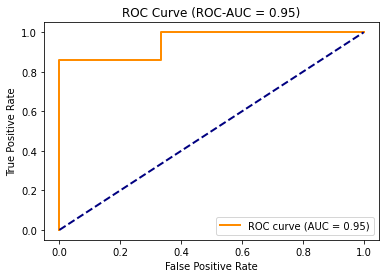

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


y_true = np.array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1])
y_prob = np.array([0.05, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (ROC-AUC = 0.95)')
plt.legend(loc='lower right')
plt.show()


0.7916666666666667


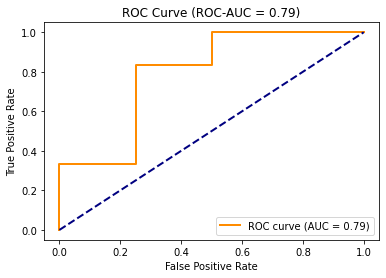

In [41]:

y_true = np.array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1])
y_prob = np.array([0.05, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)
print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (ROC-AUC = 0.79)')
plt.legend(loc='lower right')
plt.show()


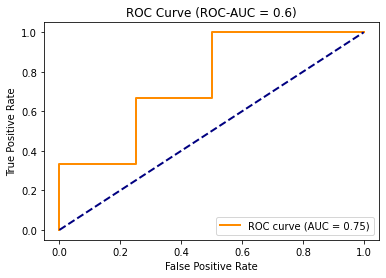

In [45]:
y_true = np.array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1])
y_prob = np.array([0.05, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (ROC-AUC = 0.6)')
plt.legend(loc='lower right')
plt.show()